# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            ray_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

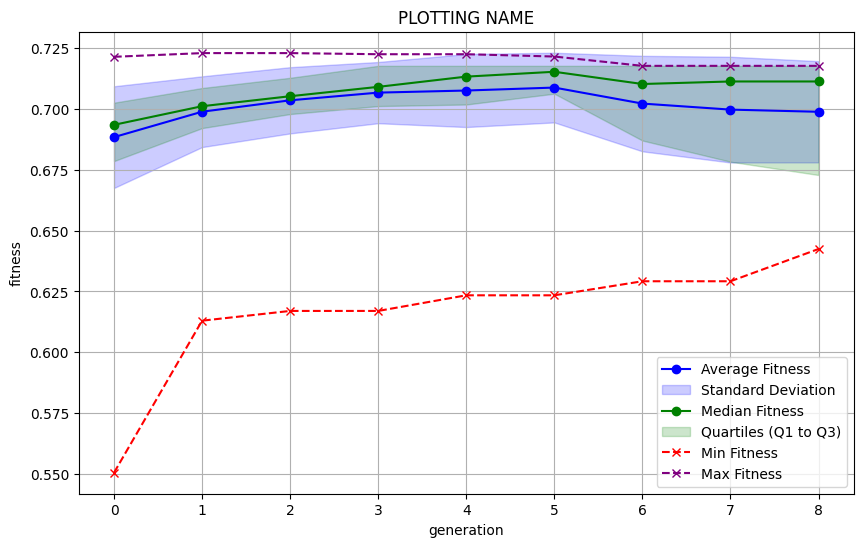

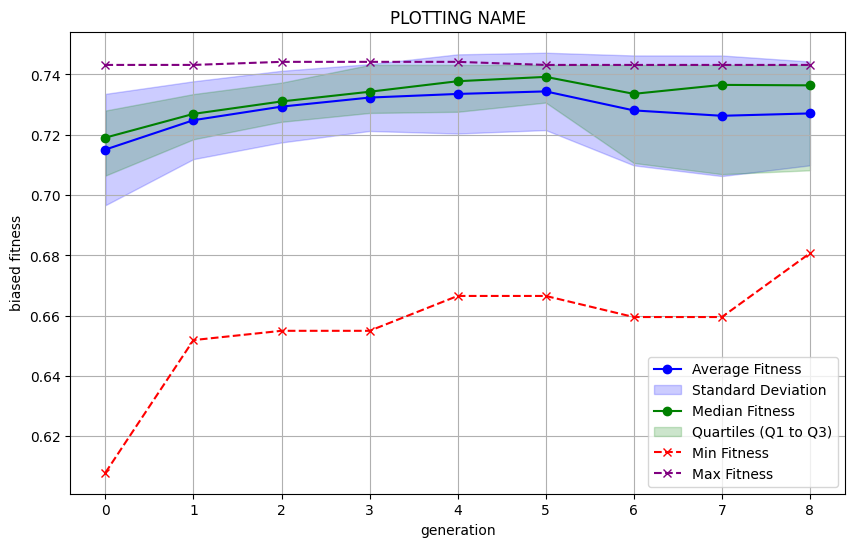

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_213: ['RayShape_453', 'GridStrictTransformation_453']
predict: (0.28875194755985367, 372.99097639999985, 457.69722329999996)
biased_fitness: 0.7361492430014642, fitness: 0.7090395259014641
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


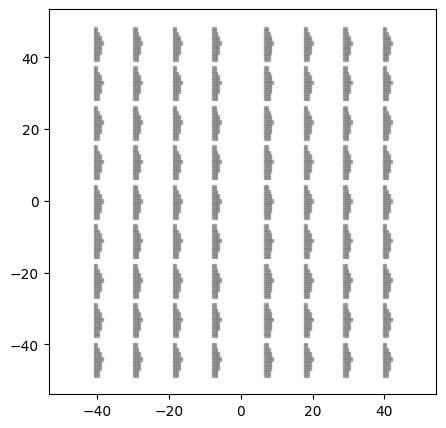

--------------------------------------------------
label: VentHole Chromosome_267: ['RayShape_430', 'GridStrictTransformation_213']
predict: (0.29111178579729025, 372.7544491, 460.6947892)
biased_fitness: 0.7082114199270974, fitness: 0.6716359505270975
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 1.3638194805821282, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


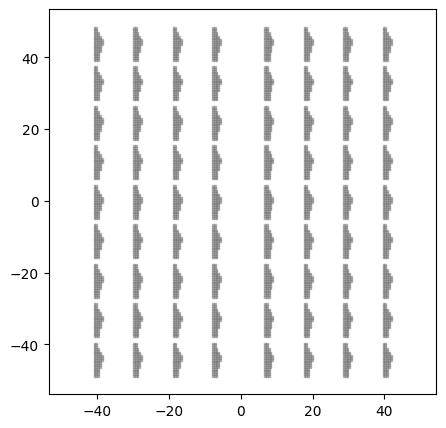

--------------------------------------------------
label: VentHole Chromosome_213: ['RayShape_287', 'GridStrictTransformation_267']
predict: (0.29103171112760684, 373.03728320000005, 460.34197039999987)
biased_fitness: 0.7077379655239314, fitness: 0.6727866207239319
shape parameter:
parameter_list: [ upper_slope: 2.108070637954173, nose_point: 2.1736111096036845, lower_coefficient: 2.555835669916757, lower_x-intercept: 2.2933689541174314, lower_y-intercept: 1.4996142623135793, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


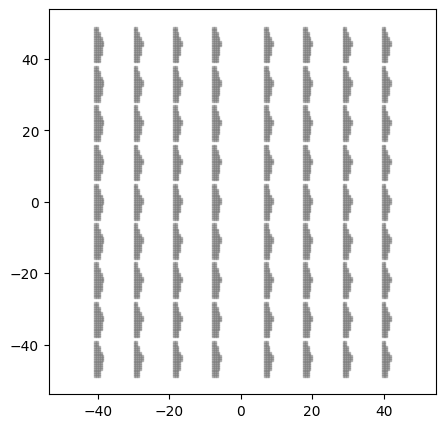

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_213', 'GridStrictTransformation_430']
predict: (0.29112260184282945, 373.08542250000005, 461.05533840000004)
biased_fitness: 0.7050653472717049, fitness: 0.6680701770717049
shape parameter:
parameter_list: [ upper_slope: 2.108070637954173, nose_point: 2.1736111096036845, lower_coefficient: 2.555835669916757, lower_x-intercept: 2.2933689541174314, lower_y-intercept: 1.4996142623135793, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


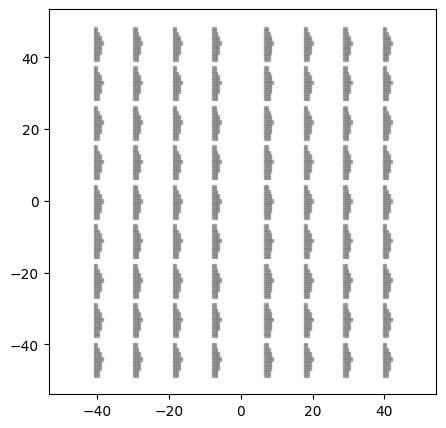

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_453', 'GridStrictTransformation_213']
predict: (0.2882660864375606, 372.9989471, 456.9974263999999)
biased_fitness: 0.7423516531243943, fitness: 0.7173572681243947
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


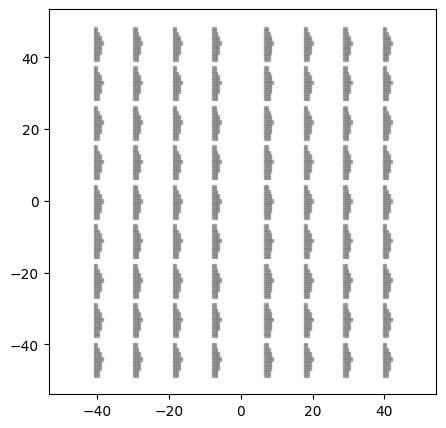

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_343', 'GridStrictTransformation_453']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


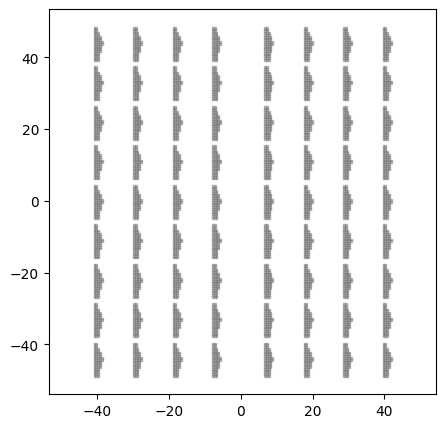

--------------------------------------------------
label: VentHole Chromosome_219: ['RayShape_362', 'GridStrictTransformation_343']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.5524708561279654, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


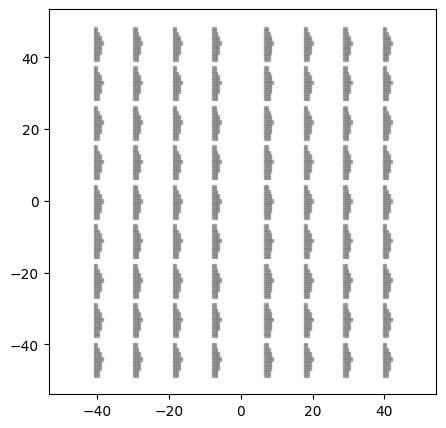

--------------------------------------------------
label: VentHole Chromosome_343: ['RayShape_362', 'GridStrictTransformation_219']
predict: (0.2917895245819504, 373.08081769999984, 457.78300420000016)
biased_fitness: 0.7049730218804968, fitness: 0.677785644680496
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


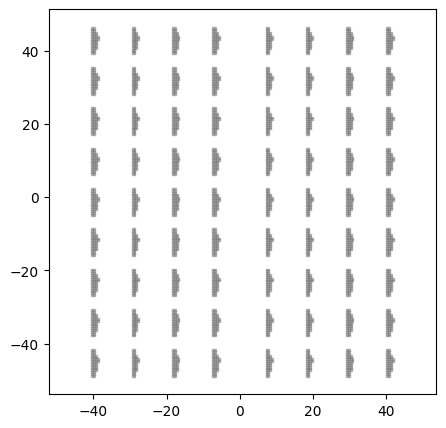

--------------------------------------------------
label: VentHole Chromosome_282: ['RayShape_343', 'GridStrictTransformation_297']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


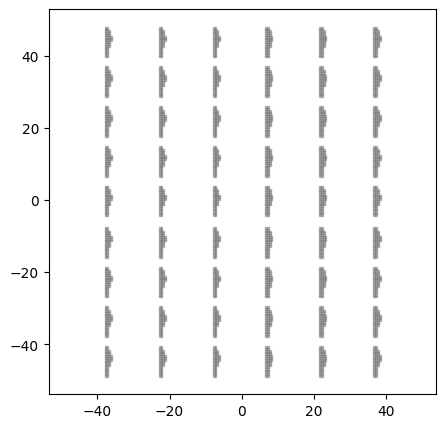

--------------------------------------------------
label: VentHole Chromosome_282: ['RayShape_343', 'GridStrictTransformation_453']
predict: (0.29114169778813137, 372.78732700000006, 460.7966339999998)
biased_fitness: 0.7074784651186861, fitness: 0.6706632171186868
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


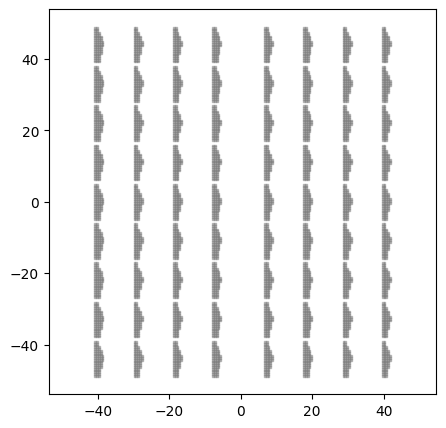

--------------------------------------------------
label: VentHole Chromosome_231: ['RayShape_453', 'GridStrictTransformation_297']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 1.235561921011345, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


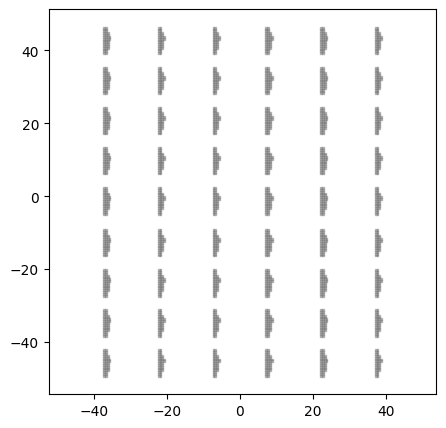

--------------------------------------------------
label: VentHole Chromosome_213: ['RayShape_453', 'GridStrictTransformation_231']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


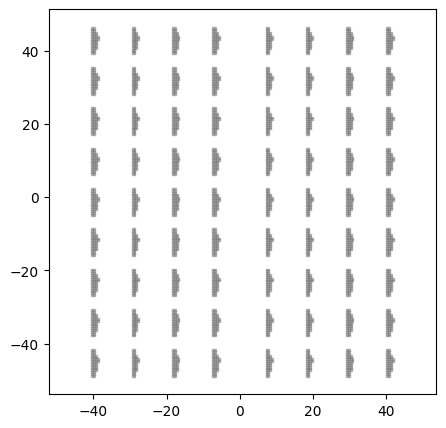

--------------------------------------------------
label: VentHole Chromosome_282: ['RayShape_231', 'GridStrictTransformation_282']
predict: (0.2909089313307991, 373.4259034999999, 456.31196019999993)
biased_fitness: 0.7143054417920098, fitness: 0.6922213681920099
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


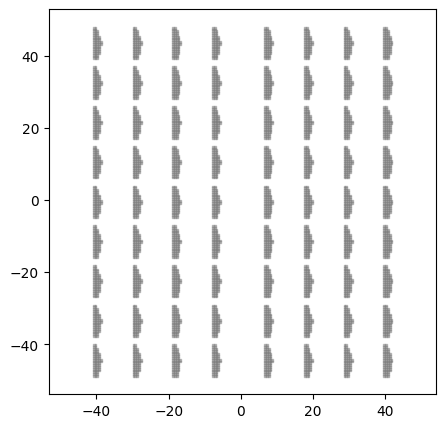

--------------------------------------------------
label: VentHole Chromosome_297: ['RayShape_282', 'GridStrictTransformation_213']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


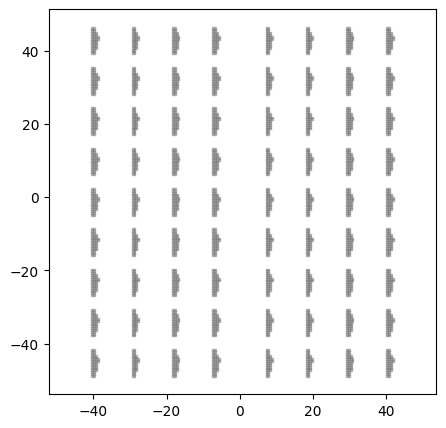

--------------------------------------------------
label: VentHole Chromosome_362: ['RayShape_56', 'GridStrictTransformation_78']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


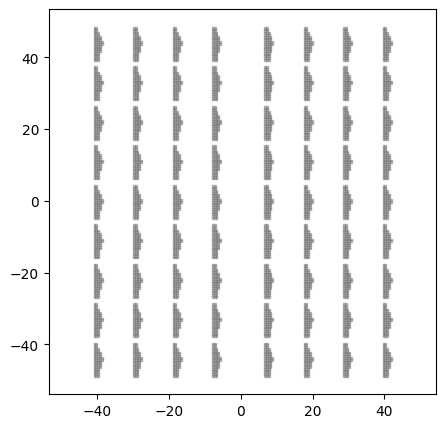

--------------------------------------------------
label: VentHole Chromosome_443: ['RayShape_155', 'GridStrictTransformation_282']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.9413980082579596, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


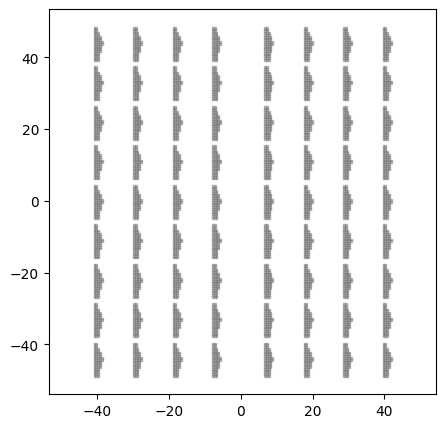

--------------------------------------------------
label: VentHole Chromosome_430: ['RayShape_453', 'GridStrictTransformation_453']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 1.235561921011345, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


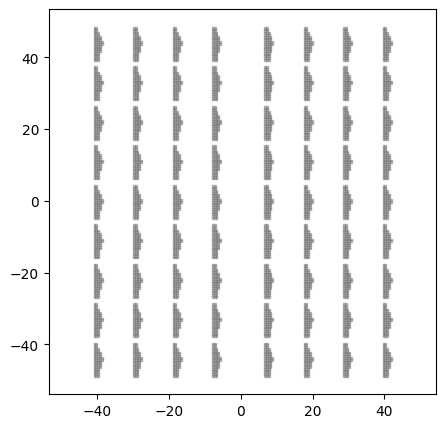

--------------------------------------------------
label: VentHole Chromosome_282: ['RayShape_56', 'GridStrictTransformation_110']
predict: (0.2910250724176229, 372.91215529999994, 459.2910737999999)
biased_fitness: 0.7107820411237717, fitness: 0.678733130323772
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


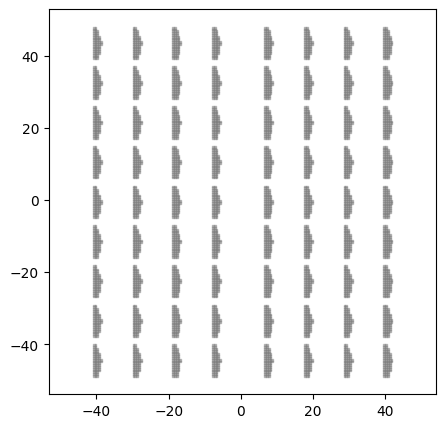

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_213', 'GridStrictTransformation_297']
predict: (0.29112260184282945, 373.08542250000005, 461.05533840000004)
biased_fitness: 0.7050653472717049, fitness: 0.6680701770717049
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


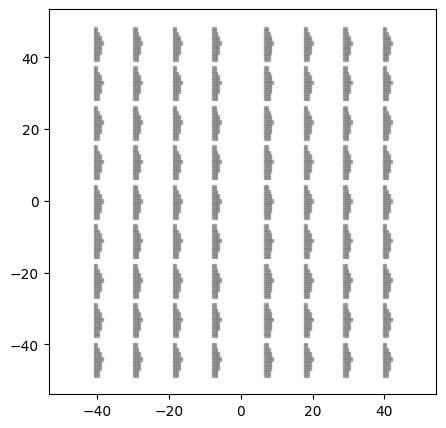

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_430', 'GridStrictTransformation_453']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 1.235561921011345, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


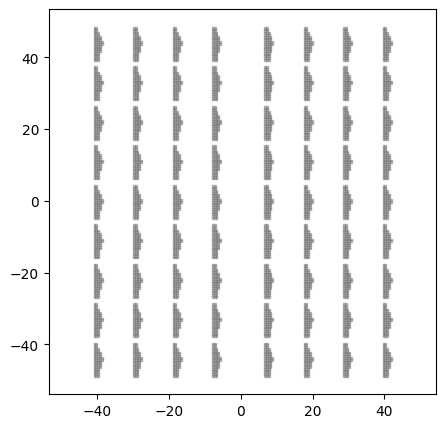

--------------------------------------------------
label: VentHole Chromosome_110: ['RayShape_78', 'GridStrictTransformation_430']
predict: (0.28828776610669116, 373.0754110999999, 457.9183466000002)
biased_fitness: 0.7397577680330887, fitness: 0.712153550433088
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


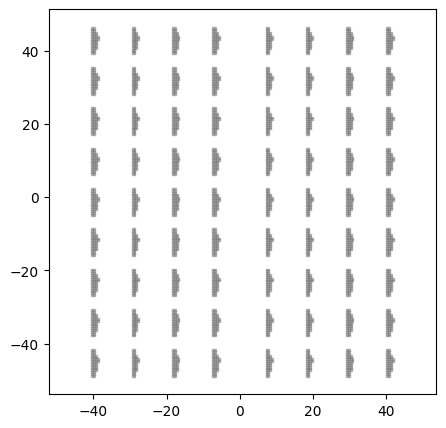

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_343', 'GridStrictTransformation_343']
predict: (0.2909952261102833, 372.80734769999987, 459.36508329999975)
biased_fitness: 0.7116661383971685, fitness: 0.6791855838971691
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


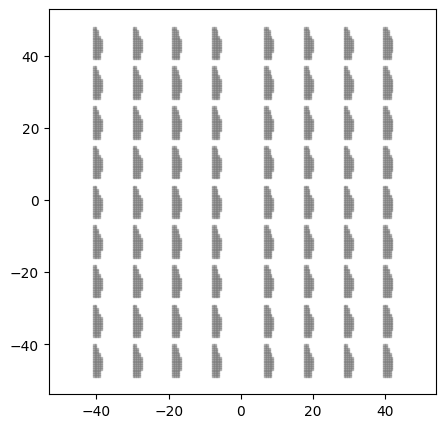

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_13', 'GridStrictTransformation_65']
predict: (0.291139333800976, 373.0434566, 460.6414774999999)
biased_fitness: 0.7060195107902398, fitness: 0.6701819914902403
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.5524708561279654, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


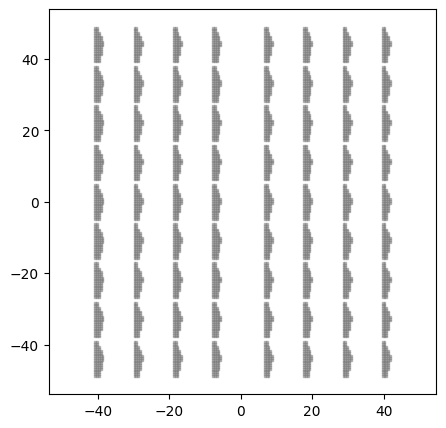

--------------------------------------------------
label: VentHole Chromosome_29: ['RayShape_297', 'GridStrictTransformation_13']
predict: (0.2909927464518385, 372.7977232999999, 458.6486796)
biased_fitness: 0.7131911131816158, fitness: 0.6828405209816156
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 1.3638194805821282, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


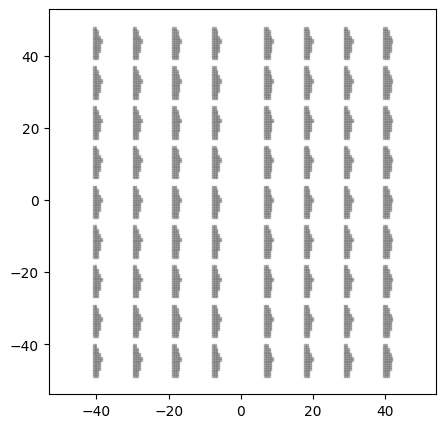

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_29', 'GridStrictTransformation_196']
predict: (0.2887505229350511, 373.0261024999999, 456.0553674)
biased_fitness: 0.7392013183494893, fitness: 0.7170874211494891
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


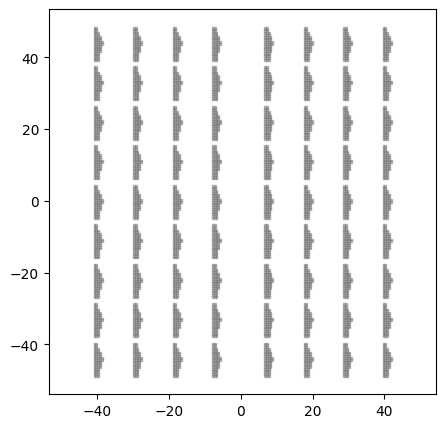

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_56', 'GridStrictTransformation_453']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.108070637954173, nose_point: 2.1736111096036845, lower_coefficient: 2.555835669916757, lower_x-intercept: 2.2933689541174314, lower_y-intercept: 1.4996142623135793, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


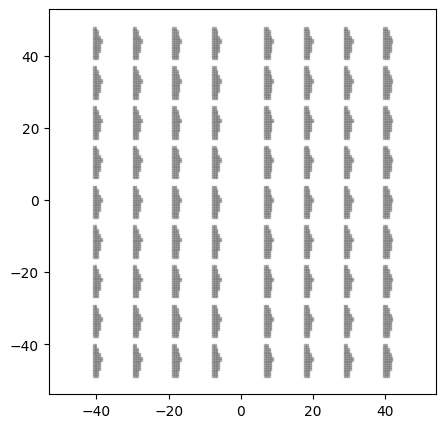

--------------------------------------------------
label: VentHole Chromosome_343: ['RayShape_362', 'GridStrictTransformation_110']
predict: (0.29111378913666996, 372.8308892, 460.4107258000001)
biased_fitness: 0.7082244326333, fitness: 0.6726540336332998
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


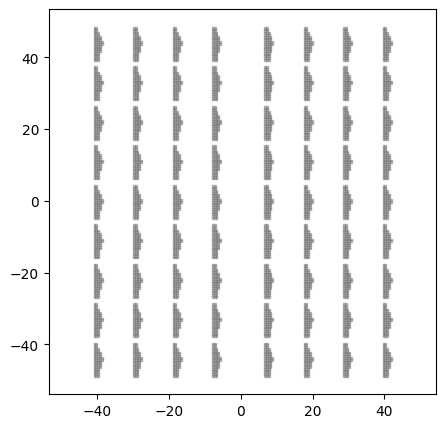

--------------------------------------------------
label: VentHole Chromosome_258: ['RayShape_470', 'GridStrictTransformation_453']
predict: (0.2910250724176229, 372.91215529999994, 459.2910737999999)
biased_fitness: 0.7107820411237717, fitness: 0.678733130323772
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.9413980082579596, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


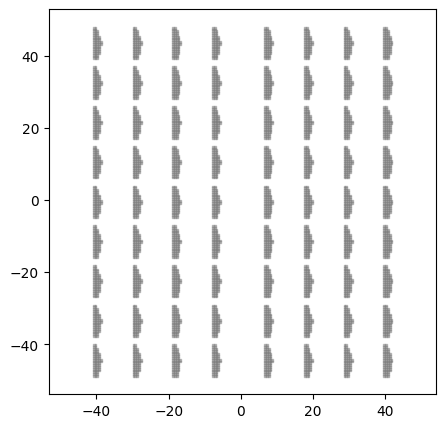

--------------------------------------------------
label: VentHole Chromosome_343: ['RayShape_110', 'GridStrictTransformation_453']
predict: (0.2909952261102833, 372.80734769999987, 459.36508329999975)
biased_fitness: 0.7116661383971685, fitness: 0.6791855838971691
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 1.3638194805821282, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


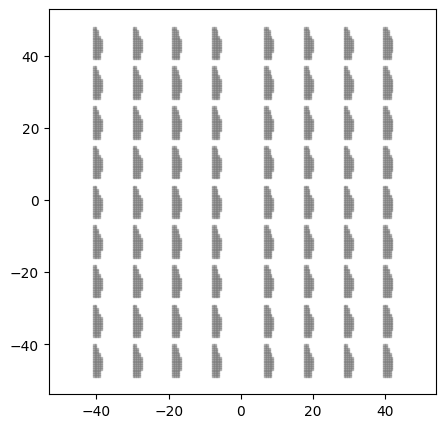

--------------------------------------------------
label: VentHole Chromosome_343: ['RayShape_213', 'GridStrictTransformation_155']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.108070637954173, nose_point: 2.1736111096036845, lower_coefficient: 2.555835669916757, lower_x-intercept: 2.2933689541174314, lower_y-intercept: 1.4996142623135793, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


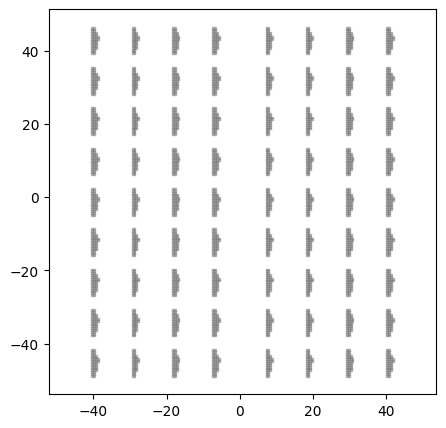

--------------------------------------------------
label: VentHole Chromosome_362: ['RayShape_453', 'GridStrictTransformation_383']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


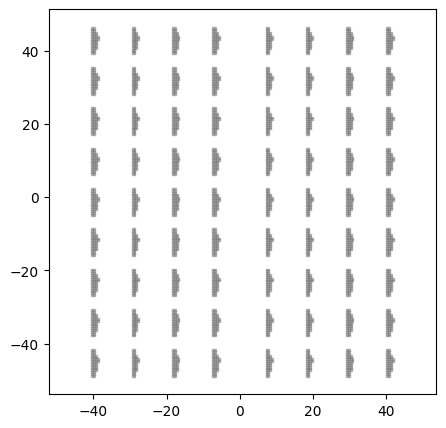

--------------------------------------------------
label: VentHole Chromosome_343: ['RayShape_453', 'GridStrictTransformation_65']
predict: (0.291126246743147, 373.03802829999995, 460.89882849999975)
biased_fitness: 0.7056736774685305, fitness: 0.6690532485685312
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


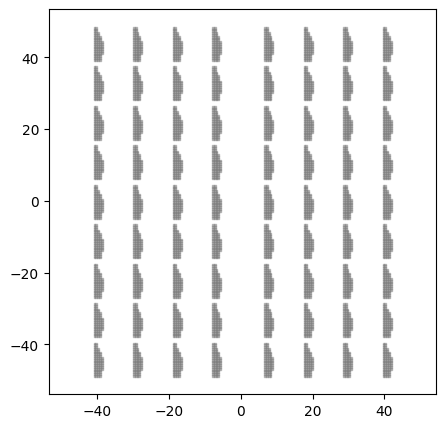

--------------------------------------------------
label: VentHole Chromosome_362: ['RayShape_383', 'GridStrictTransformation_453']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.9413980082579596, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


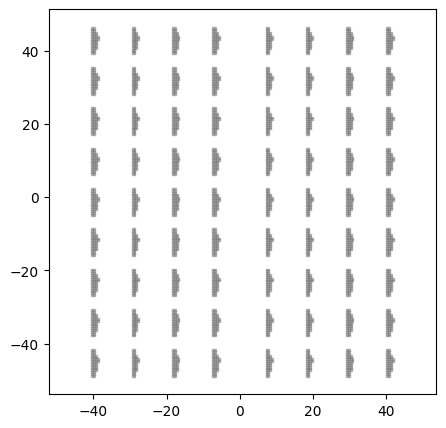

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_362', 'GridStrictTransformation_155']
predict: (0.2917895245819504, 373.08081769999984, 457.78300420000016)
biased_fitness: 0.7049730218804968, fitness: 0.677785644680496
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.9413980082579596, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


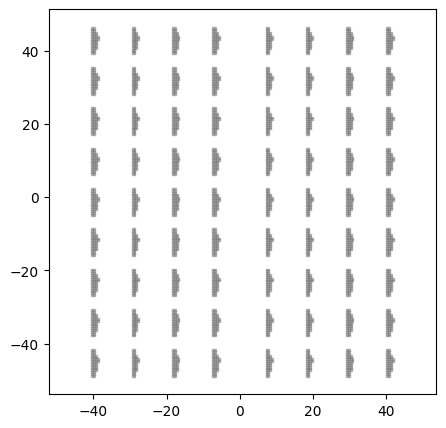

--------------------------------------------------
label: VentHole Chromosome_65: ['RayShape_122', 'GridStrictTransformation_430']
predict: (0.2917895245819504, 373.08081769999984, 457.78300420000016)
biased_fitness: 0.7049730218804968, fitness: 0.677785644680496
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.5524708561279654, ]
pattern parameter:
parameter_list: [ dx: 1.602136408479592, dy: 0.6522394945400096, ]


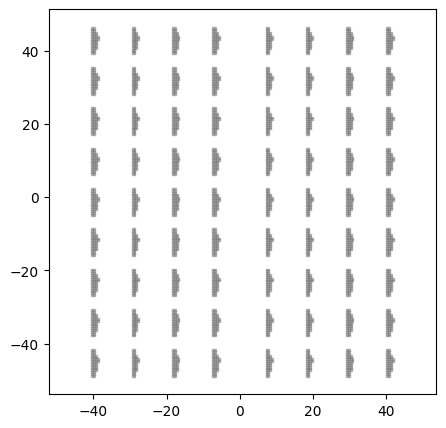

--------------------------------------------------
label: VentHole Chromosome_297: ['RayShape_362', 'GridStrictTransformation_488']
predict: (0.29112260184282945, 373.08542250000005, 461.05533840000004)
biased_fitness: 0.7050653472717049, fitness: 0.6680701770717049
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.5524708561279654, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 4.757624507850143, ]


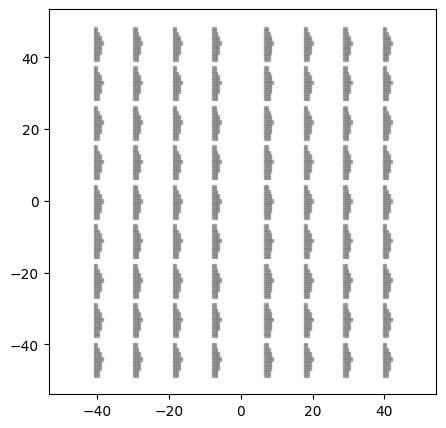

--------------------------------------------------
label: VentHole Chromosome_258: ['RayShape_29', 'GridStrictTransformation_453']
predict: (0.2881374132813961, 373.01212759999987, 457.18790520000005)
biased_fitness: 0.7431651635860399, fitness: 0.7176257031860395
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


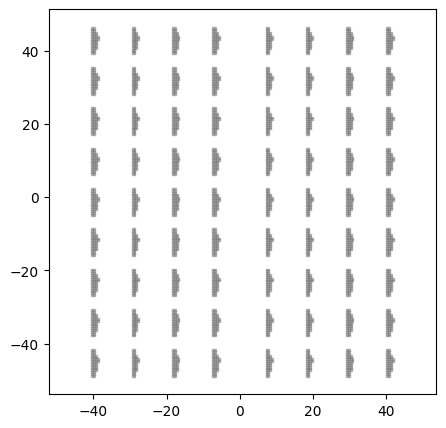

--------------------------------------------------
label: VentHole Chromosome_137: ['RayShape_453', 'GridStrictTransformation_258']
predict: (0.2888426922961098, 372.92455009999975, 457.0597914999999)
biased_fitness: 0.7369816433389037, fitness: 0.7116513690389035
shape parameter:
parameter_list: [ upper_slope: 1.235561921011345, nose_point: 1.4150511279186022, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.0872332655485515, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


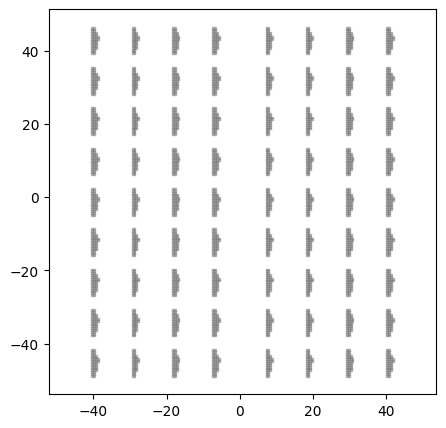

--------------------------------------------------
label: VentHole Chromosome_453: ['RayShape_137', 'GridStrictTransformation_137']
predict: (0.28866611706936585, 373.21816369999993, 457.2075168)
biased_fitness: 0.7363966498063418, fitness: 0.7112104268063417
shape parameter:
parameter_list: [ upper_slope: 2.5442888221095155, nose_point: 1.0366695370415224, lower_coefficient: 1.6425717269149473, lower_x-intercept: 2.2206615961276492, lower_y-intercept: 1.9413980082579596, ]
pattern parameter:
parameter_list: [ dx: 4.918682240360695, dy: 0.6522394945400096, ]


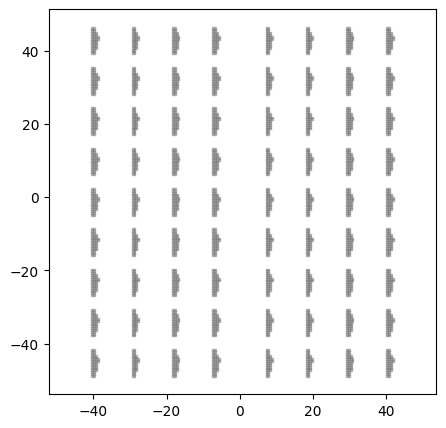

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )